### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_71 = pd.read_csv('Patient 3243_data.csv')

In [3]:
patient_71.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,...,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000
mean,0.048417,0.191271,0.557915,1.572963,1.763764,5.393692,1.493757,1.091607,1.008555,1.004522,...,1.727428,1.877828,1.998483,1.762169,0.969735,1.446070,2.001412,1.973993,1.945226,41.806665
std,0.011294,0.014582,0.032112,0.015778,0.011577,4.565001,0.311058,0.019989,0.003572,0.002624,...,0.031266,0.039905,0.024744,0.021128,0.068130,0.033293,0.020711,0.006131,0.020675,16.150842
min,0.008173,0.147572,0.520184,1.535117,1.731668,1.982808,1.199400,1.054835,0.997453,0.996208,...,1.585378,1.751747,1.892451,1.615899,0.485432,1.319640,1.962383,1.956132,1.905540,21.200000
25%,0.043660,0.181137,0.535744,1.560528,1.754838,2.408483,1.289729,1.077526,1.006667,1.001817,...,1.707297,1.846987,1.983449,1.752607,0.949185,1.424011,1.985652,1.969101,1.925991,29.400000
50%,0.051522,0.185381,0.544540,1.569607,1.761702,3.187735,1.375724,1.091760,1.008565,1.004440,...,1.725197,1.891254,1.999854,1.764464,0.992080,1.439579,1.991740,1.974625,1.949035,34.500000
75%,0.054765,0.199490,0.569772,1.583809,1.771658,6.907183,1.575516,1.103760,1.011302,1.006828,...,1.747804,1.907019,2.019264,1.775144,1.010722,1.469174,2.015681,1.978168,1.956873,51.800000
max,0.077992,0.234788,0.712832,1.617658,1.796192,28.702521,3.890364,1.194911,1.026160,1.018921,...,1.818626,1.969984,2.042714,1.810084,1.102275,1.541965,2.062120,1.996535,2.011494,97.500000


In [4]:
X=patient_71.drop('BIS', axis=1)
y= patient_71['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

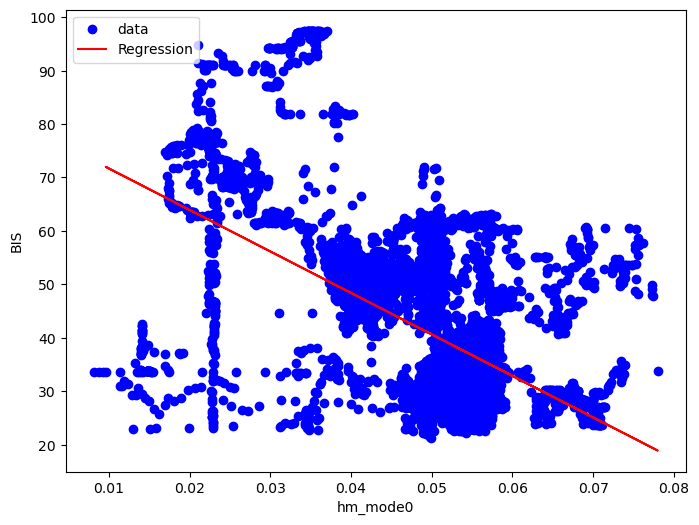

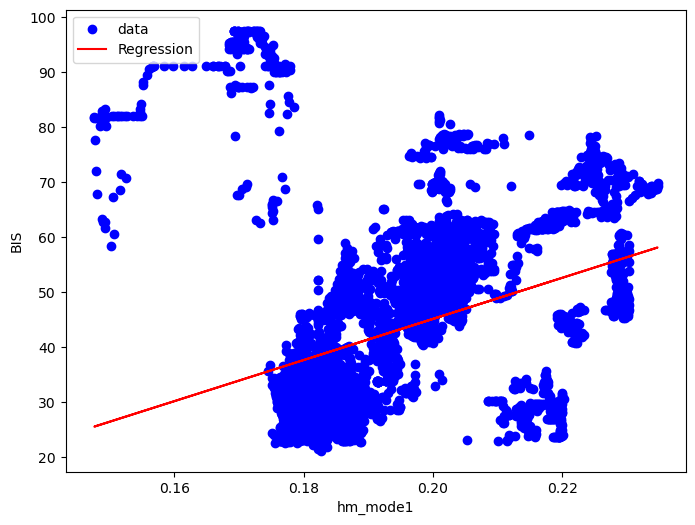

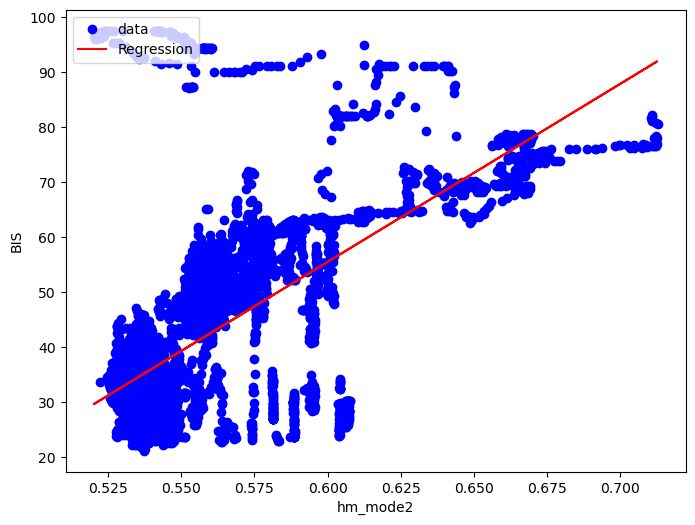

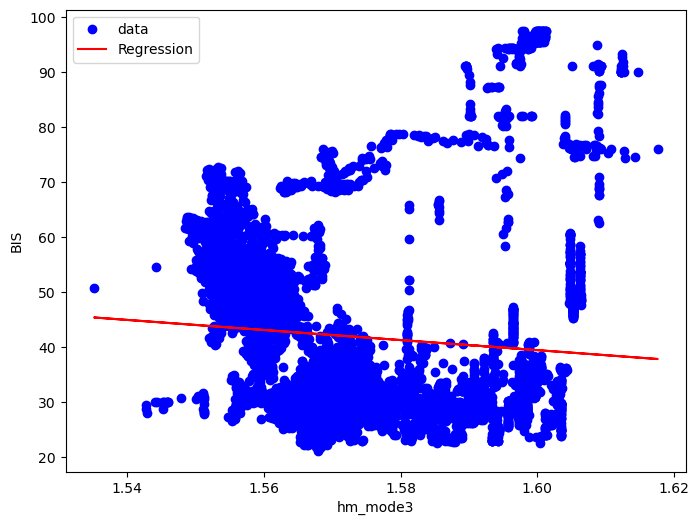

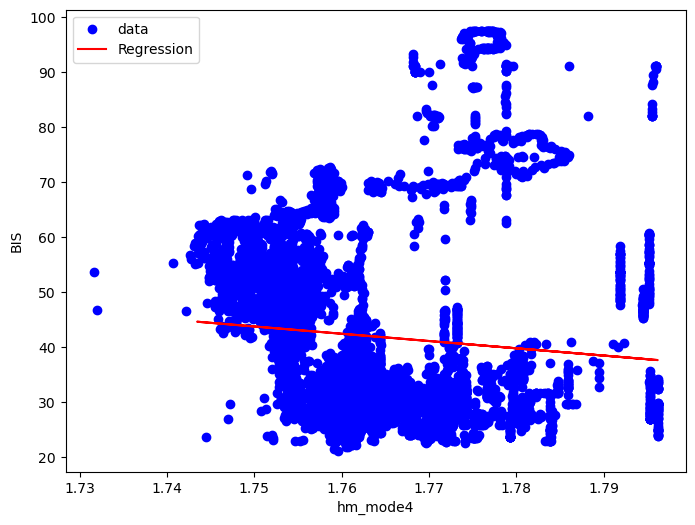

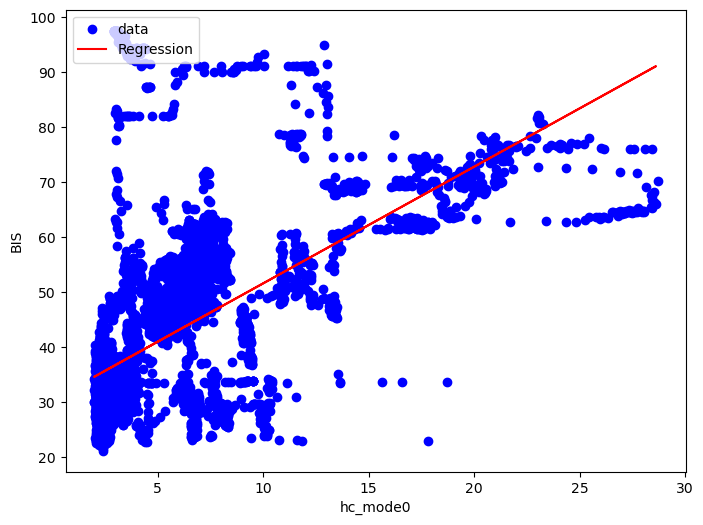

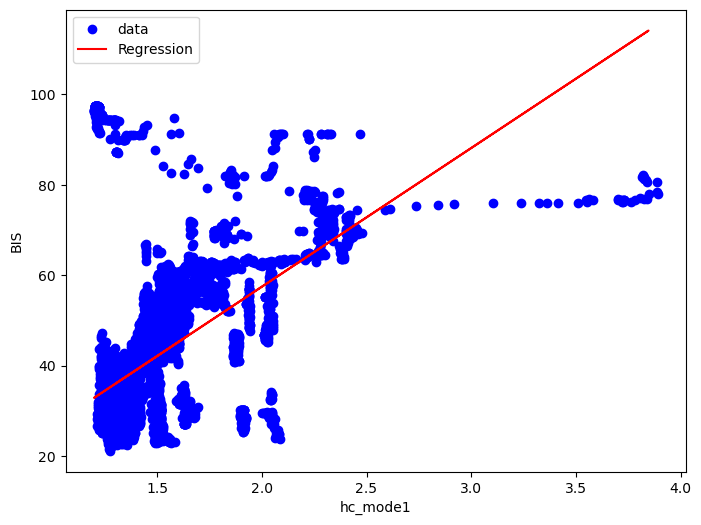

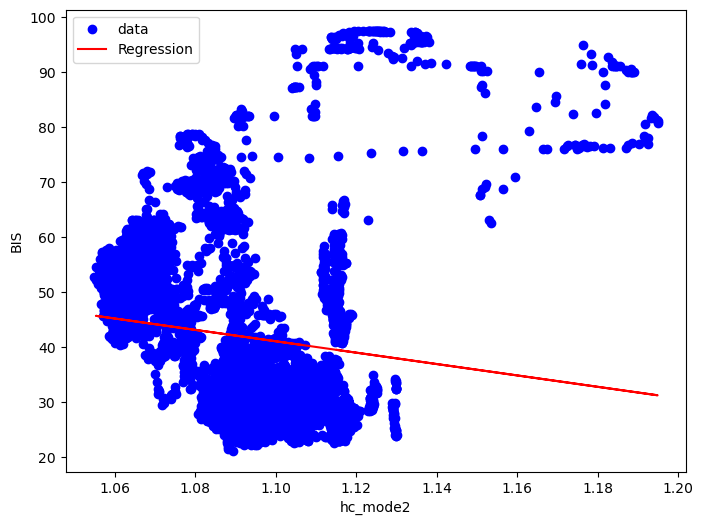

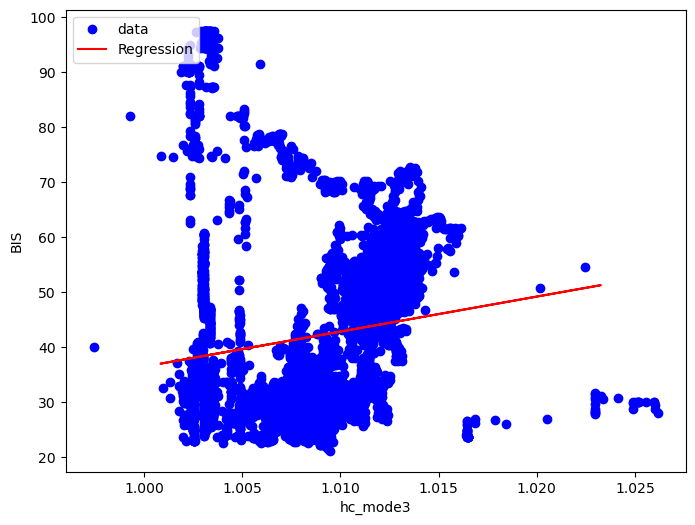

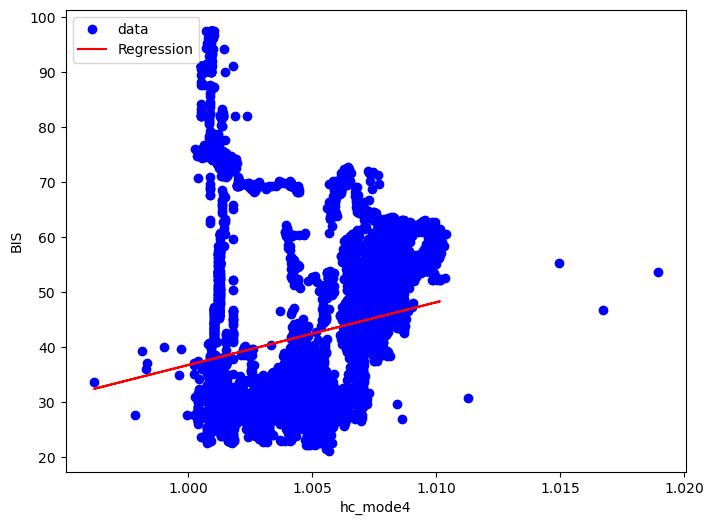

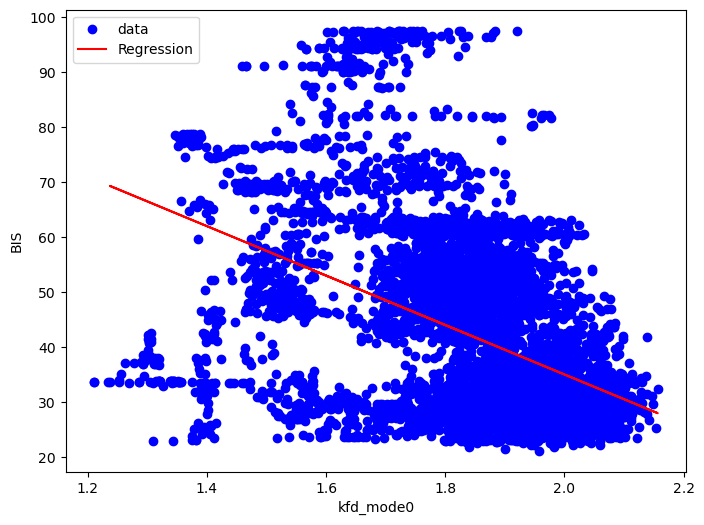

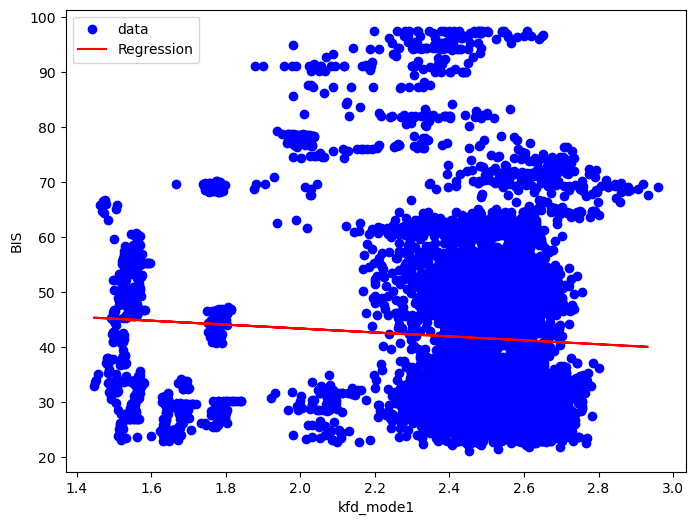

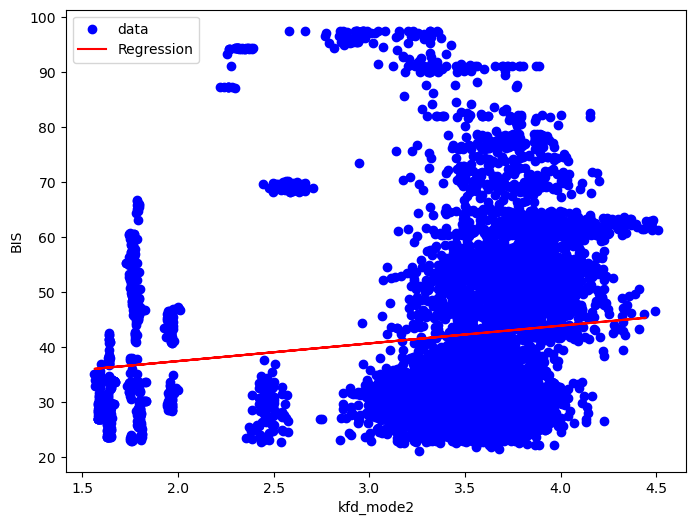

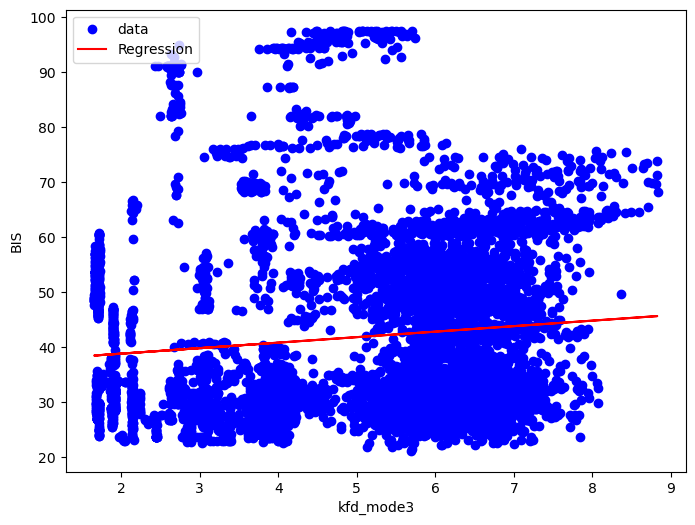

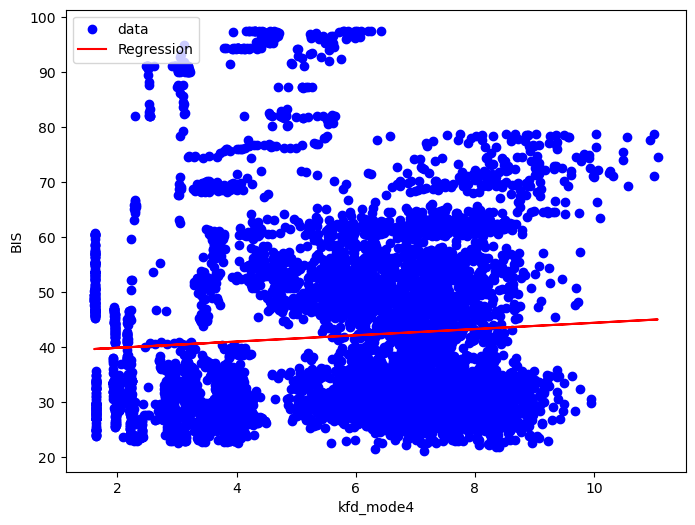

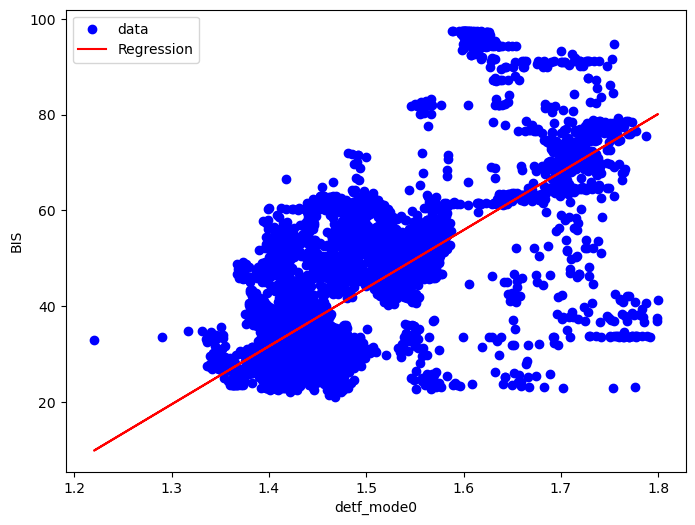

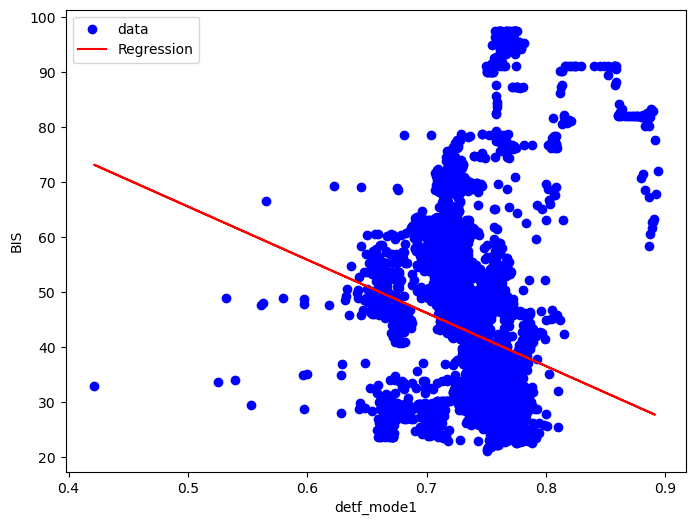

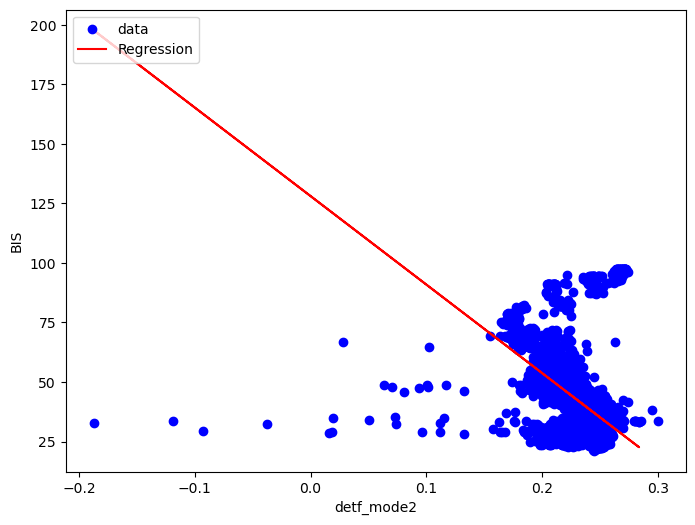

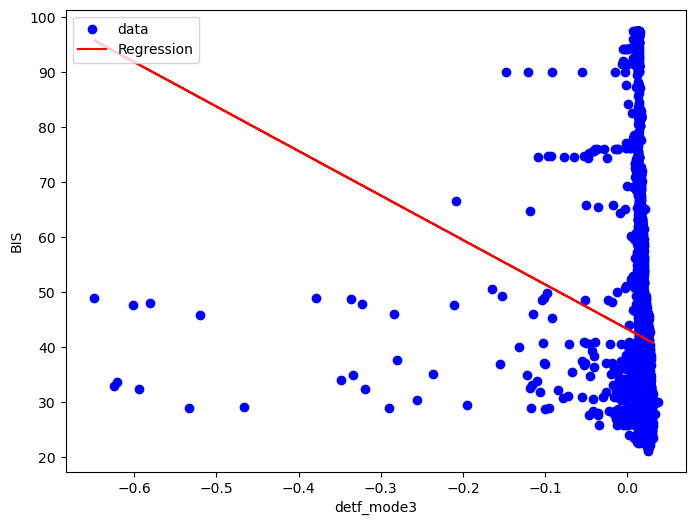

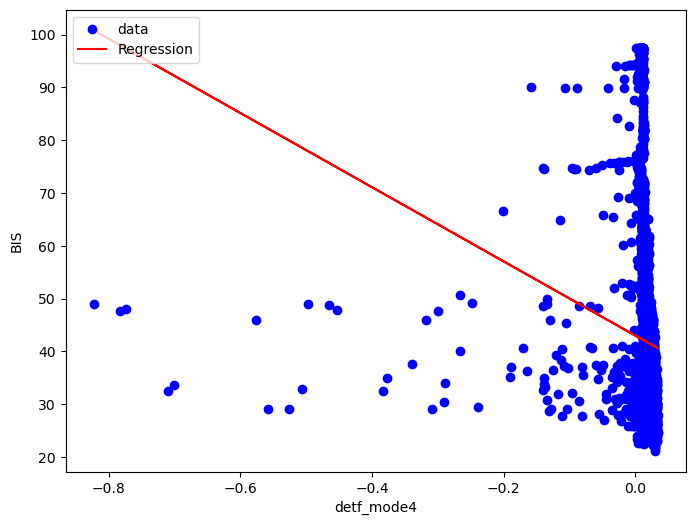

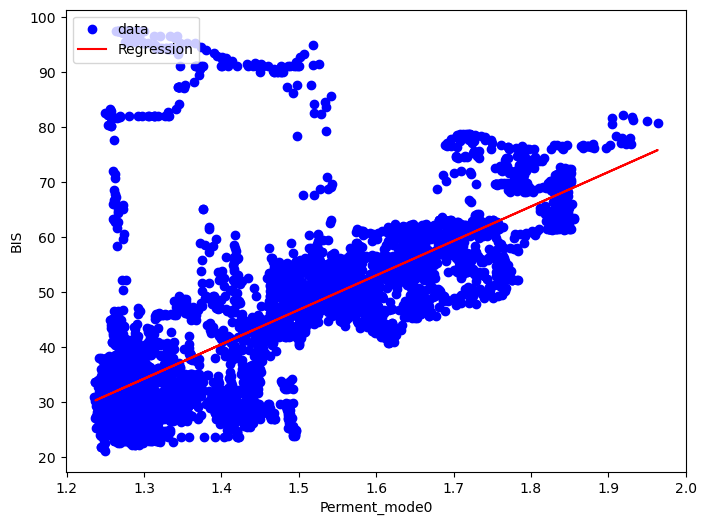

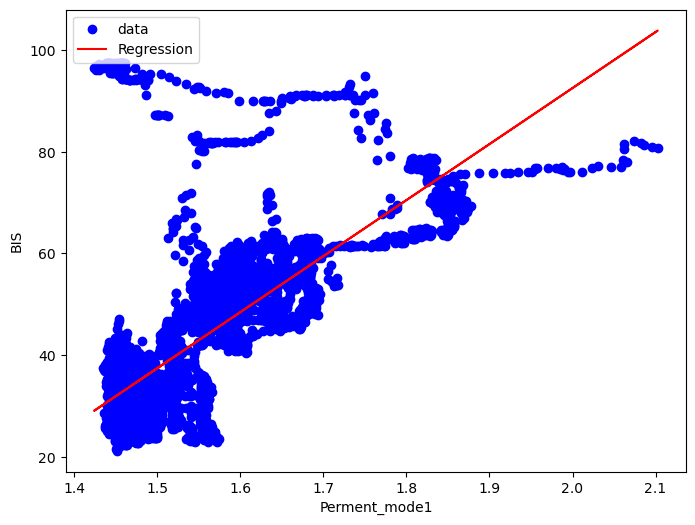

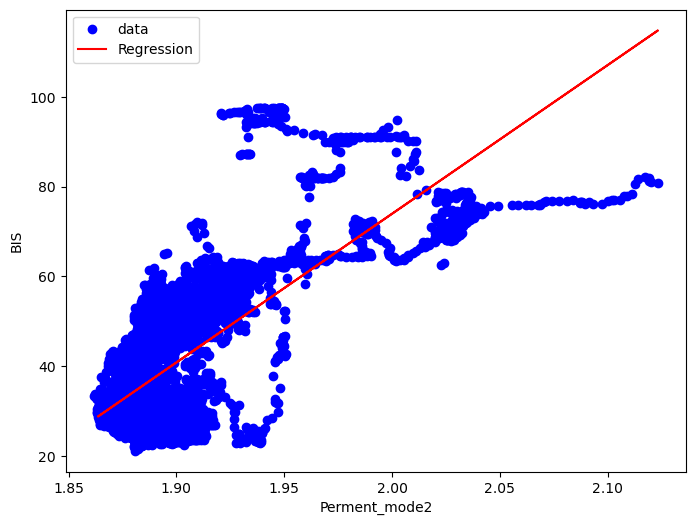

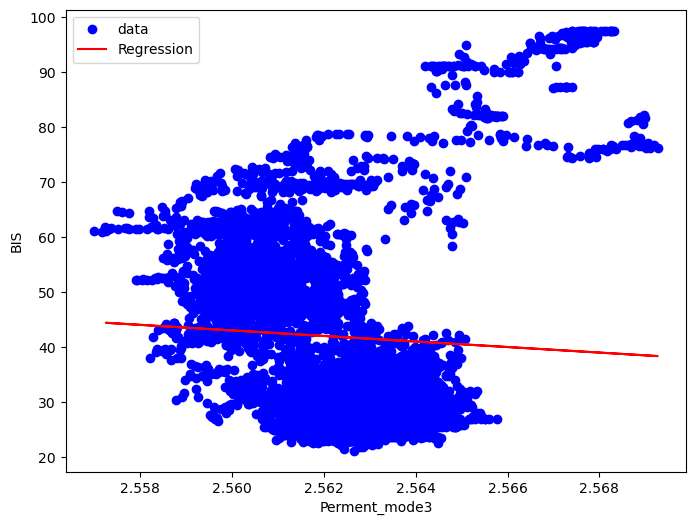

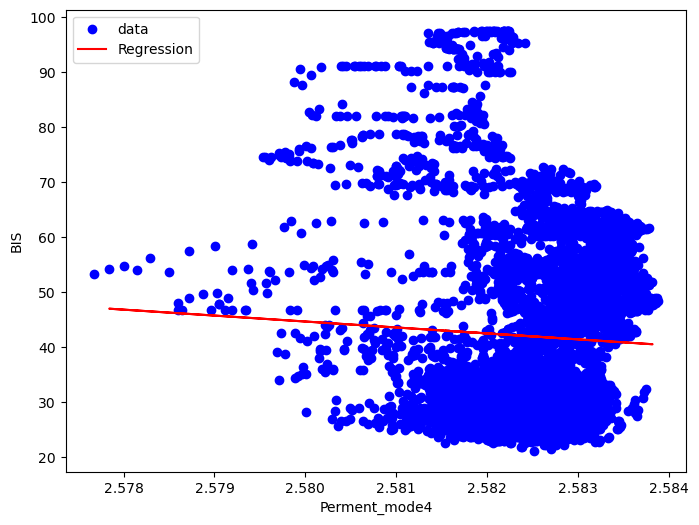

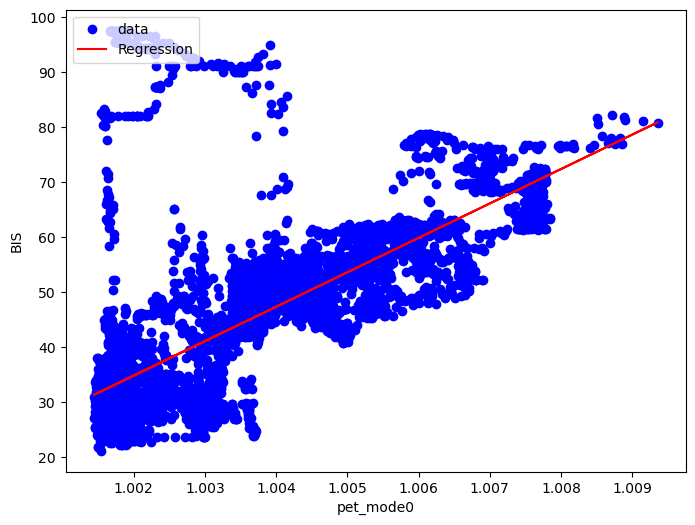

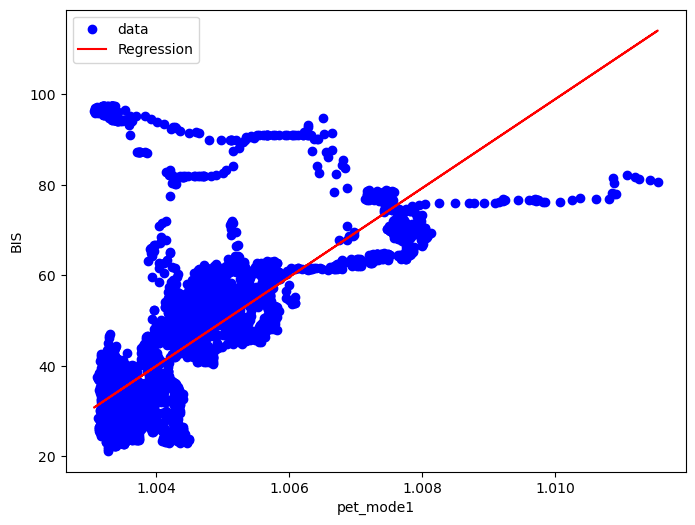

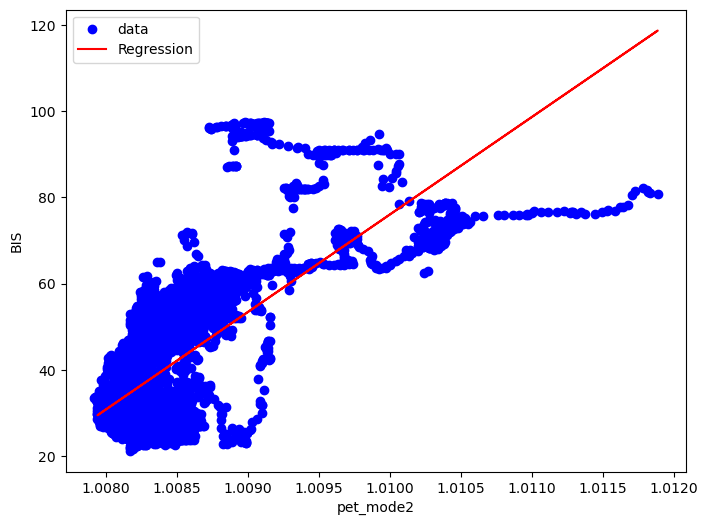

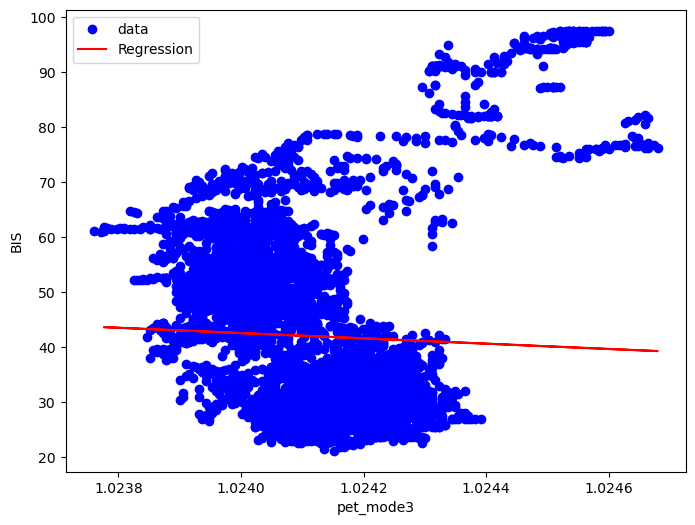

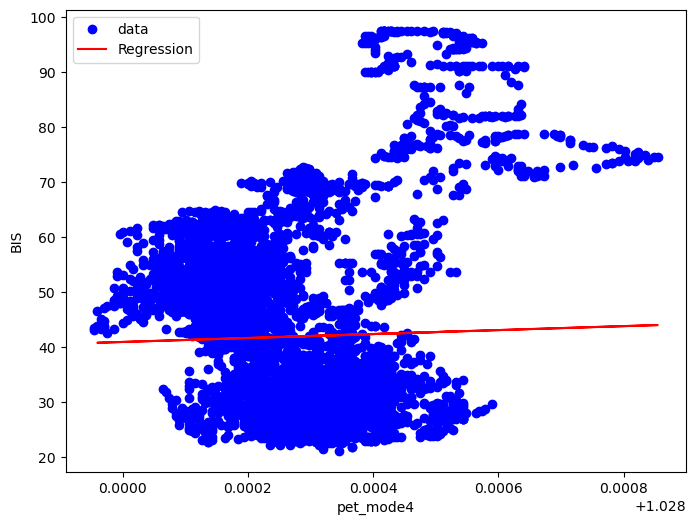

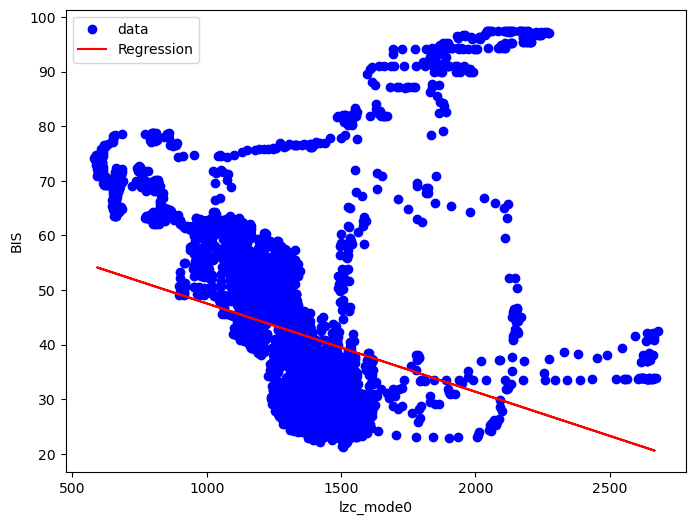

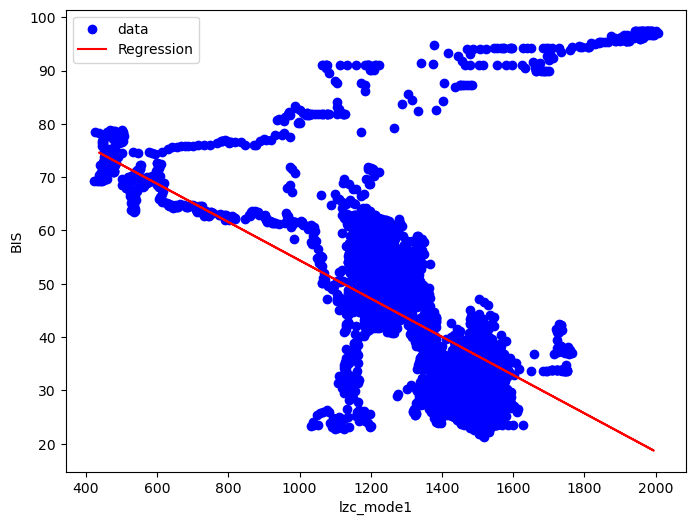

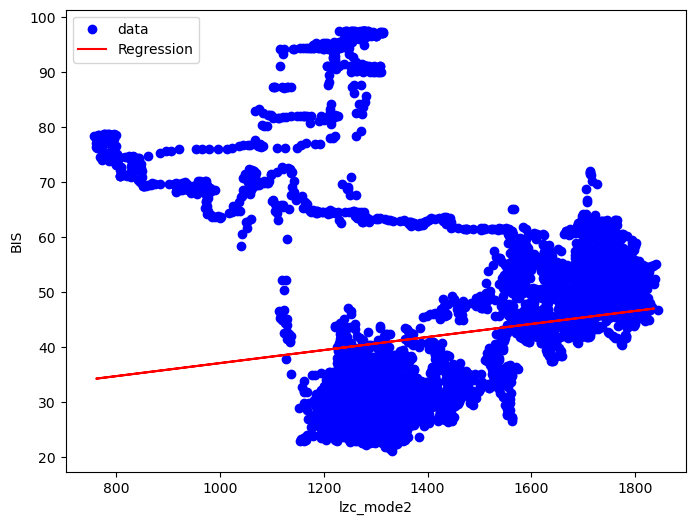

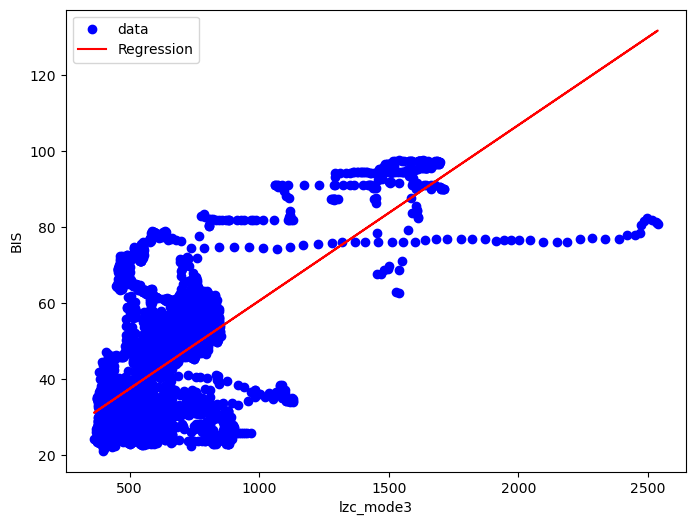

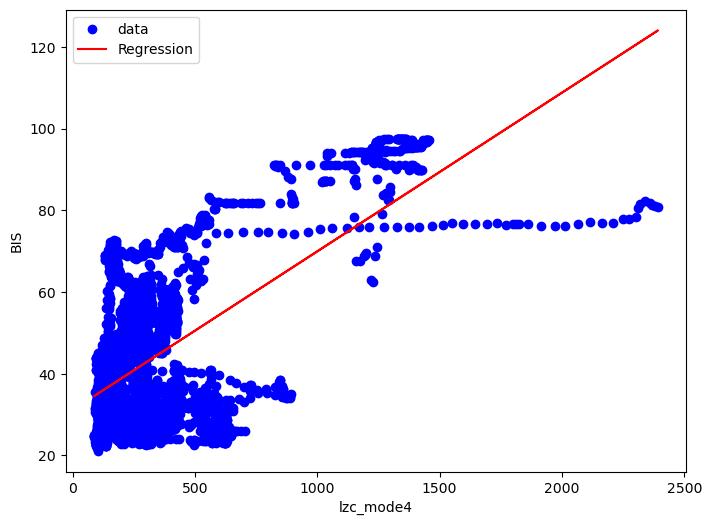

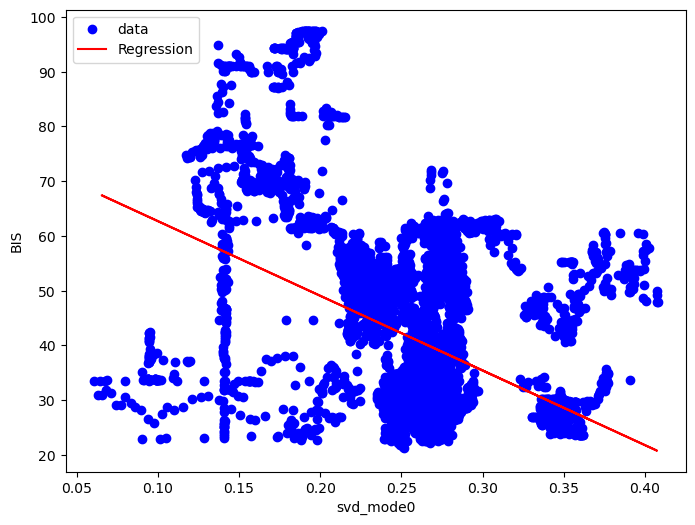

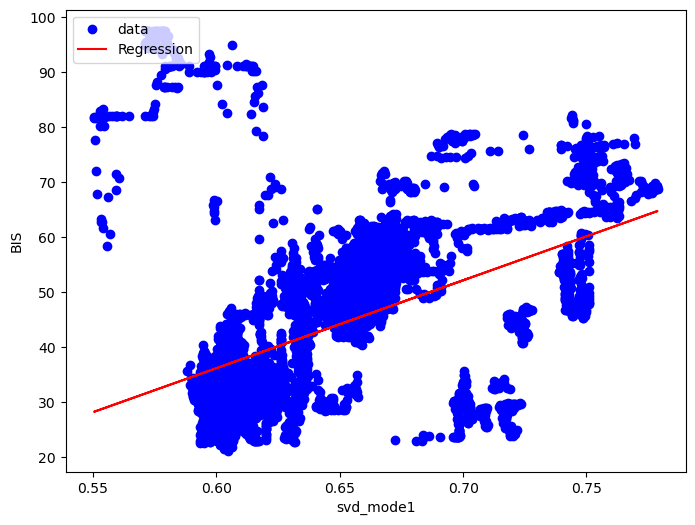

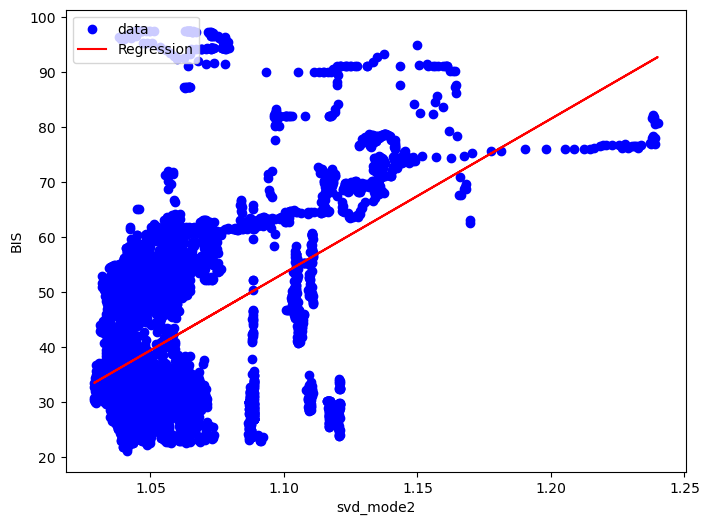

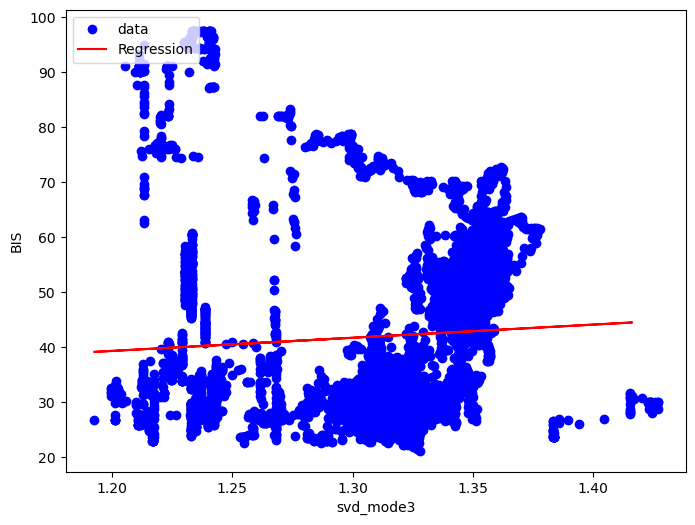

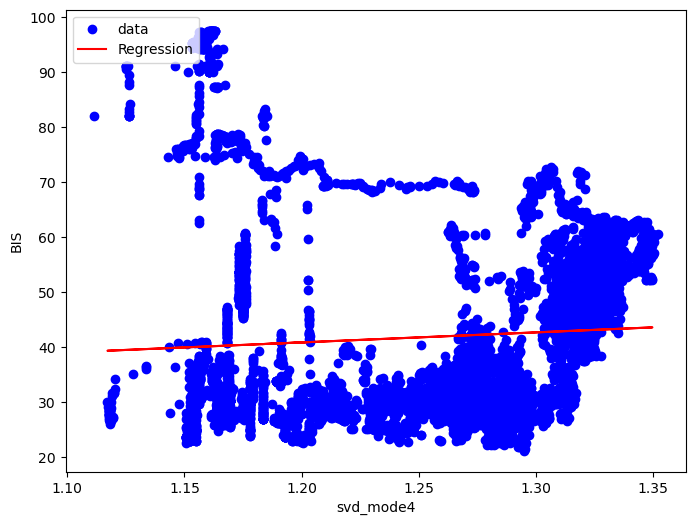

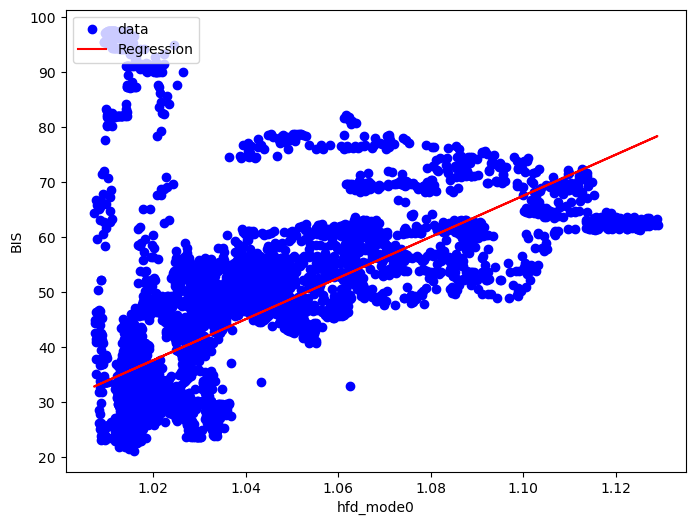

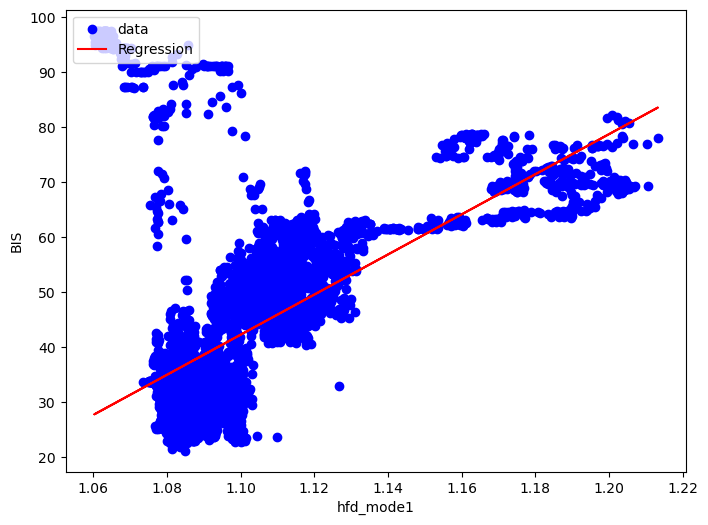

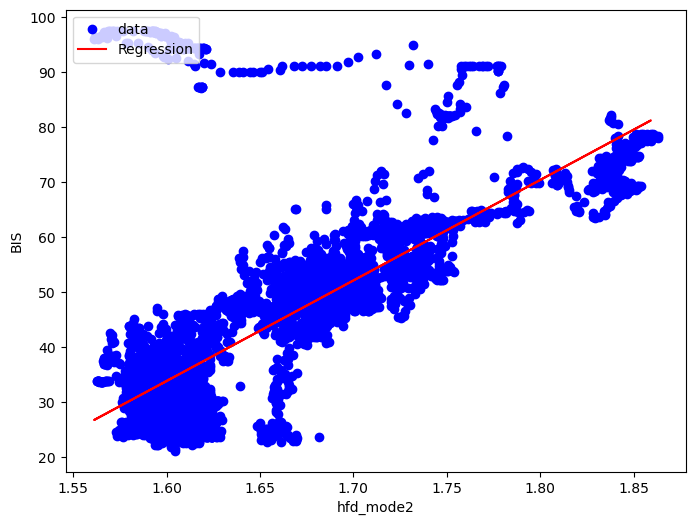

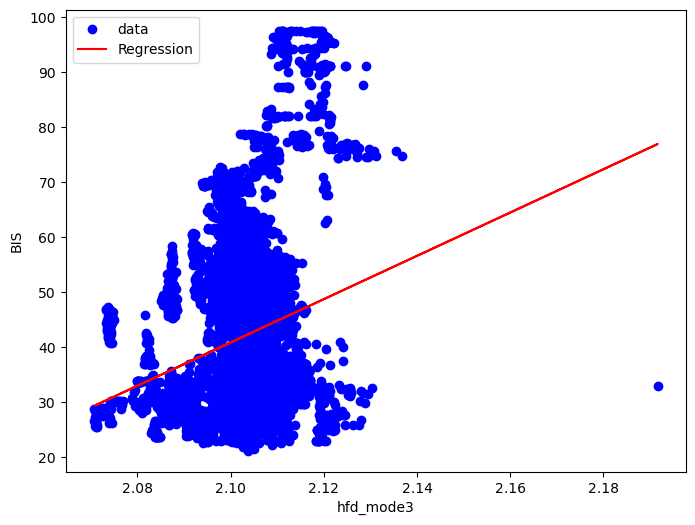

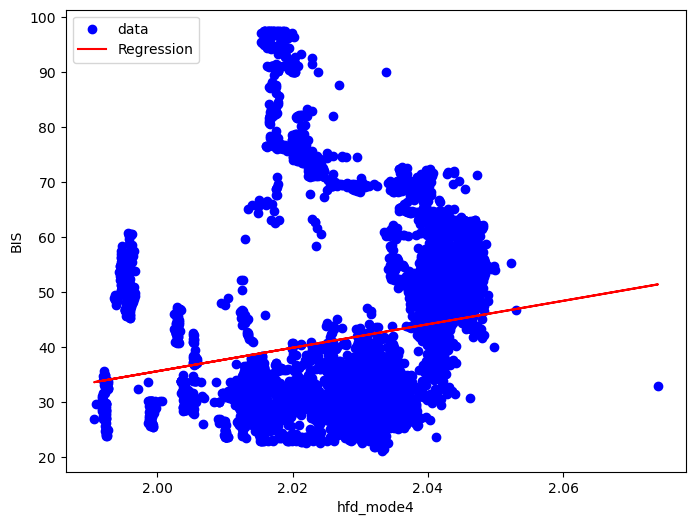

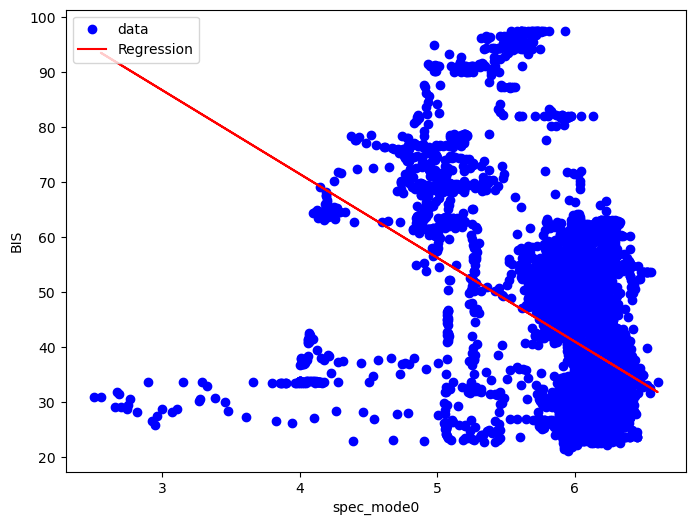

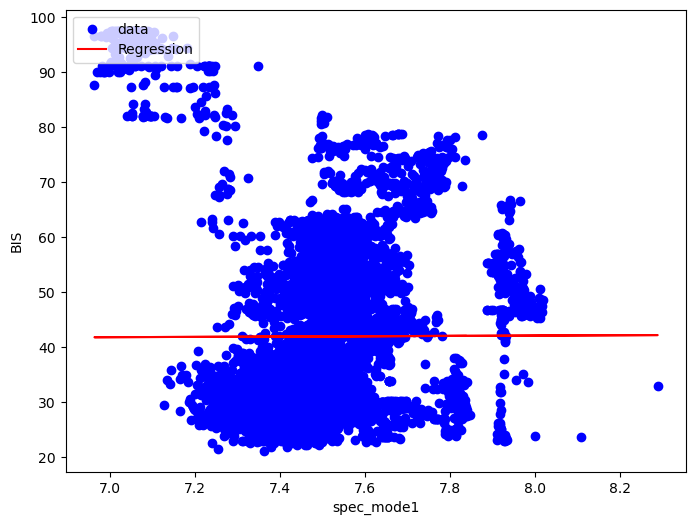

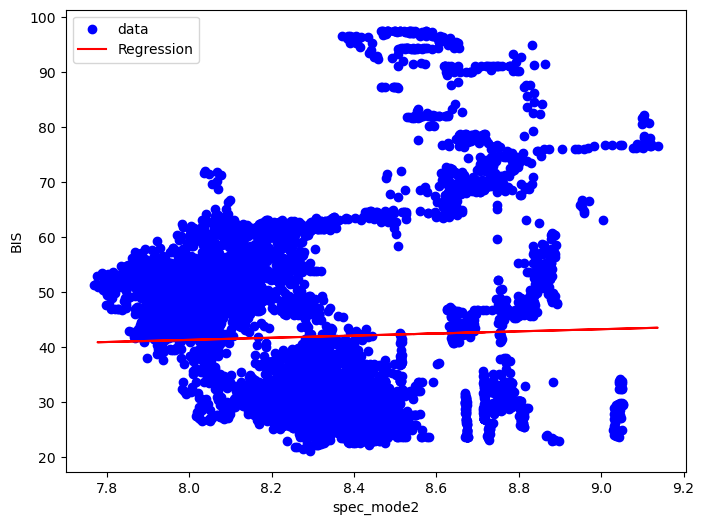

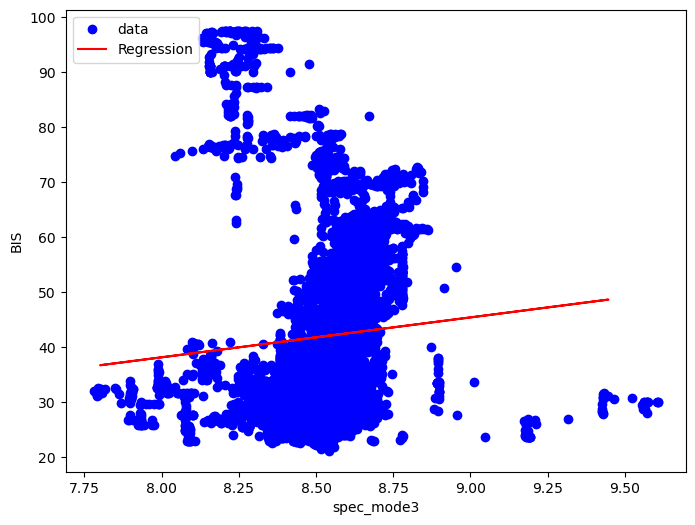

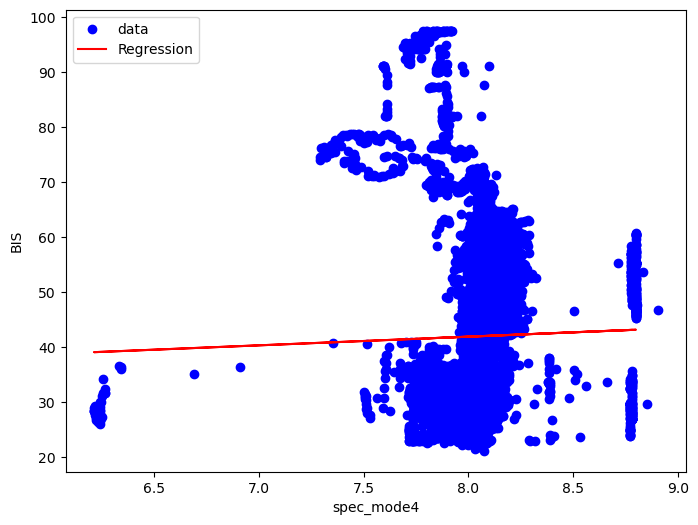

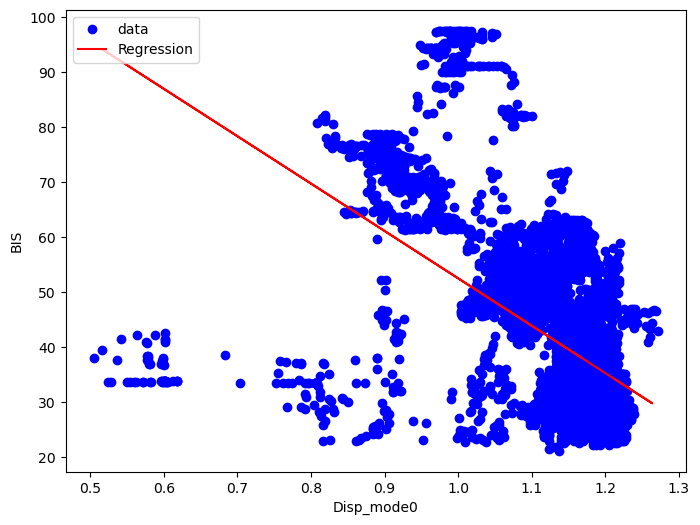

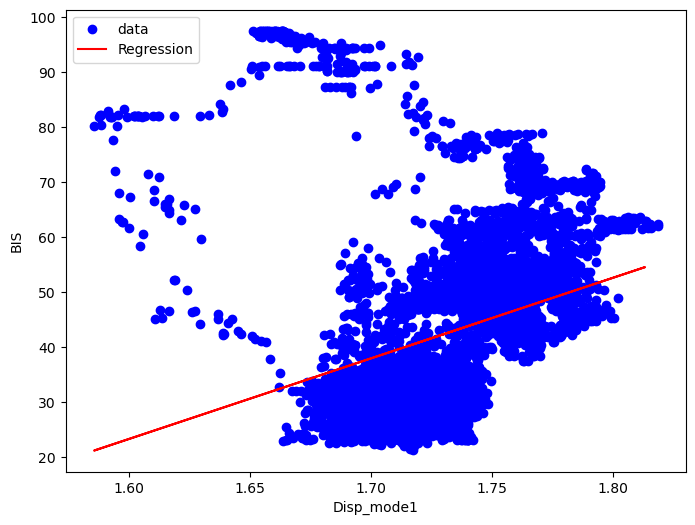

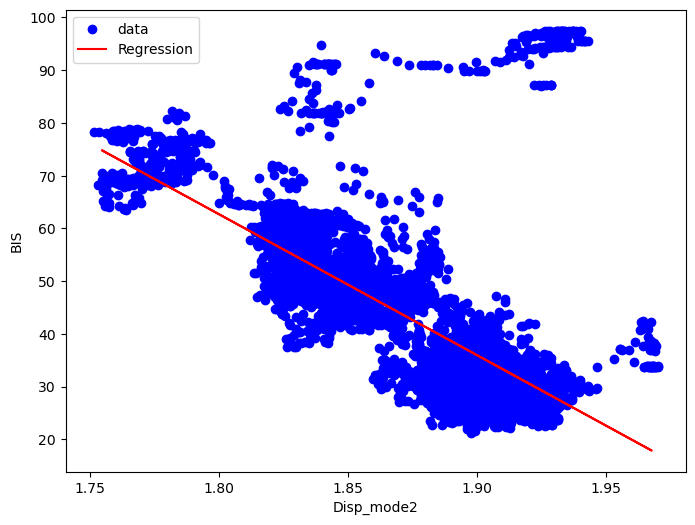

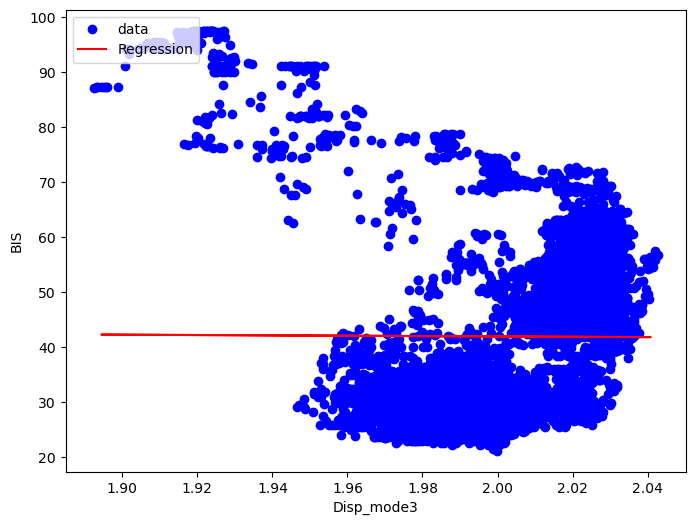

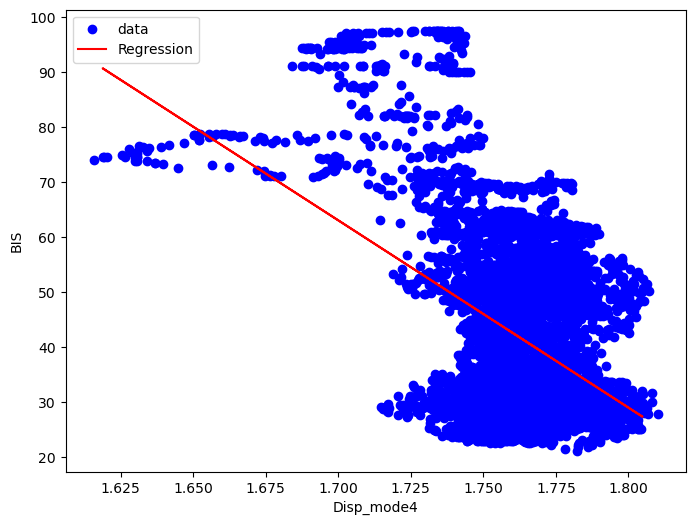

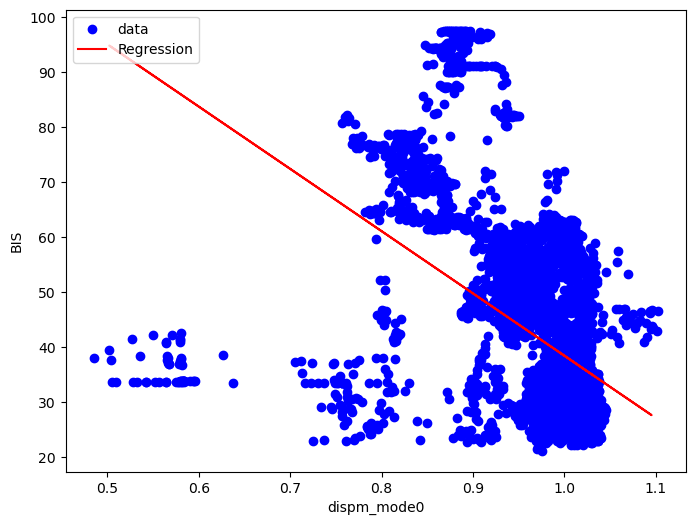

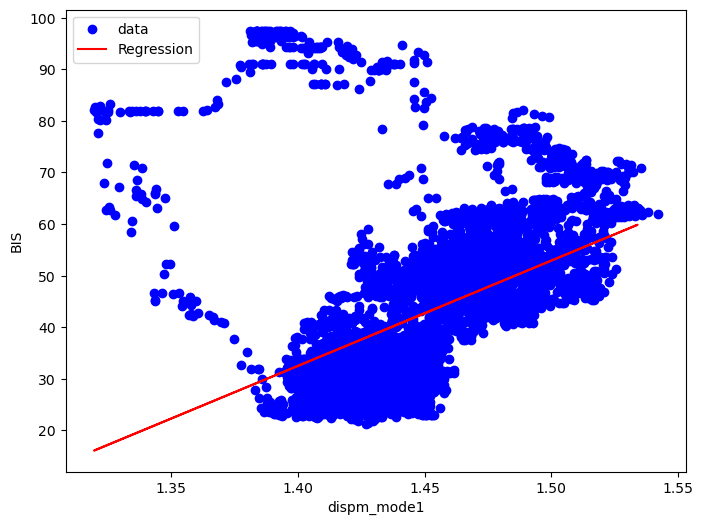

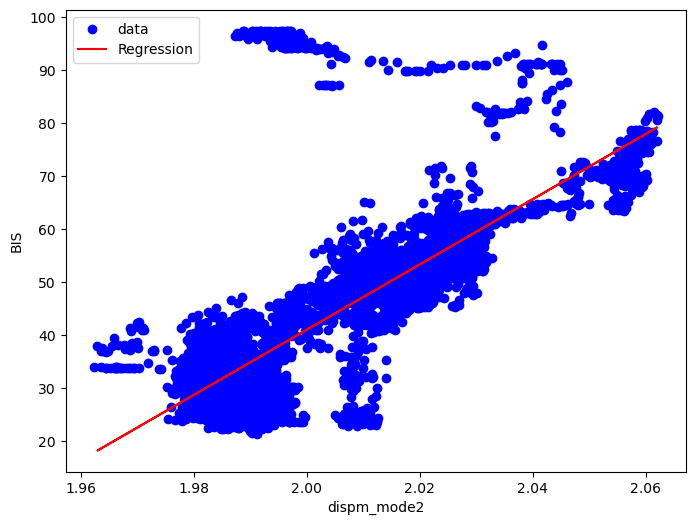

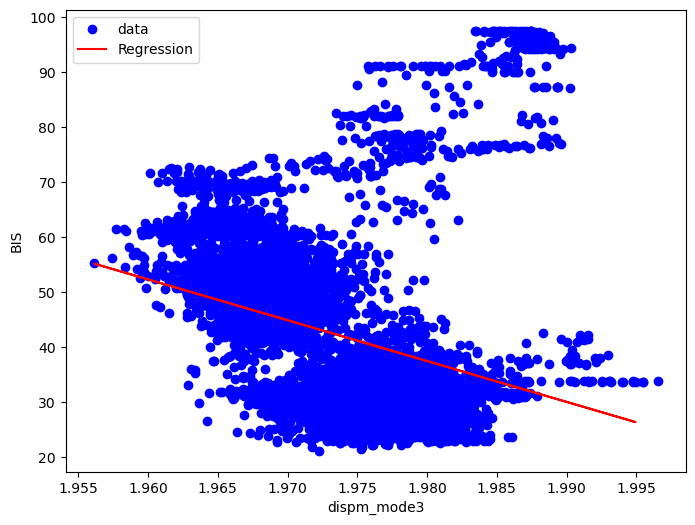

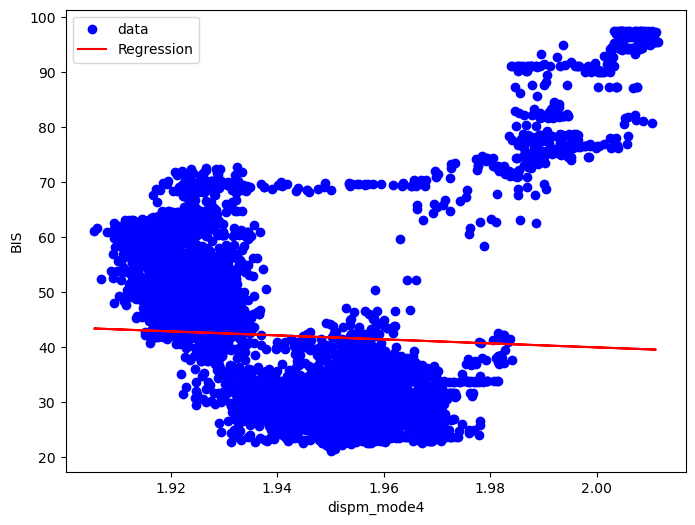

In [6]:

for column in patient_71.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_71, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
57,dispm_mode2_r2,62.158340
42,hfd_mode2_r2,56.340927
21,Perment_mode1_r2,50.923041
22,Perment_mode2_r2,50.598588
27,pet_mode2_r2,49.430146
26,pet_mode1_r2,49.264301
15,detf_mode0_r2,47.970340
20,Perment_mode0_r2,47.299221
25,pet_mode0_r2,47.290477
52,Disp_mode2_r2,45.679926


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
57    dispm_mode2    0.607269
59    dispm_mode4    0.160419
22  Perment_mode2    0.035336
27      pet_mode2    0.031962
32      lzc_mode2    0.030306
34      lzc_mode4    0.018819
33      lzc_mode3    0.012183
31      lzc_mode1    0.009278
42      hfd_mode2    0.008942
46     spec_mode1    0.007268
44      hfd_mode4    0.006581
53     Disp_mode3    0.005973
30      lzc_mode0    0.004016
52     Disp_mode2    0.003965
1        hm_mode1    0.003546
41      hfd_mode1    0.002619
56    dispm_mode1    0.002400
5        hc_mode0    0.002358
43      hfd_mode3    0.002293
36      svd_mode1    0.002106
51     Disp_mode1    0.002046
23  Perment_mode3    0.001984
48     spec_mode3    0.001933
37      svd_mode2    0.001911
38      svd_mode3    0.001710
7        hc_mode2    0.001687
6        hc_mode1    0.001687
16     detf_mode1    0.001463
8        hc_mode3    0.001435
29      pet_mode4    0.001404
39      svd_mode4    0.001312
50     Disp_mode0    0.001309
49     spe